In [0]:
%%capture
!pip install hyperas
!pip install hyperopt

# Import dataset from Google Drive

In [0]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

# pietro
output_preprocessing = pd.read_csv("/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/output_preprocessing_50_clusters.csv")
# carlo
#output_preprocessing = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/output_preprocessing.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Keras train test definition

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

cols = list(output_preprocessing.columns.values)
cols.remove('trip_duration')

target = output_preprocessing.loc[:, 'trip_duration']
features = output_preprocessing.loc[:, cols]

train_features, test_features, train_target, test_target = \
    train_test_split(features, target, test_size=0.20, random_state=0)

train_x, train_y = np.array(train_features), np.array(train_target)
test_x, test_y = np.array(test_features), np.array(test_target)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled_x = scaler.fit_transform(train_x)
test_scaled_x = scaler.transform(test_x)

In [0]:
cols

['total_distance',
 'total_travel_time',
 'number_of_steps',
 'maximum_temperature',
 'minimum_temperature',
 'average_temperature',
 'precipitation',
 'snow_fall',
 'snow_depth',
 'vendor_id',
 'passenger_count',
 'store_and_fwd_flag',
 'pickup_cluster',
 'dropoff_cluster',
 'JFK_start',
 'JFK_end',
 'guardia_start',
 'guardia_end',
 'pickup_hour',
 'pickup_minute',
 'pickup_day_week']

# Hyperas model 

In [0]:
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.utils import np_utils

np.save("train_scaled_x", train_scaled_x)
np.save("train_y", train_y)
np.save("test_scaled_x", test_scaled_x)
np.save("test_y", test_y)

def data():
  train_scaled_x = np.load("train_scaled_x.npy")
  train_y = np.load("train_y.npy")
  train_y = np.log(train_y + 1)
  test_scaled_x = np.load("test_scaled_x.npy")
  test_y = np.load("test_y.npy")
  test_y = np.log(test_y + 1)
  return train_scaled_x, train_y, test_scaled_x, test_y

def model(train_scaled_x, train_y, test_scaled_x, test_y):
    num_features = train_scaled_x.shape[1]
    model = Sequential()
    model.add(Dense(128, input_dim=num_features, activation='relu'))
    model.add(Dropout(0.414))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dropout(0.04))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1, activation = 'relu'))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae', 'mape', 'cosine'])
    history = model.fit(train_scaled_x, train_y,
                       batch_size={{choice([128, 256, 512])}},
                       epochs={{choice([5, 10, 20])}},
                       verbose=2,
                       validation_split=0.2)
    score = model.evaluate(test_scaled_x, test_y, verbose=0)    
    loss = score[1]
    return {'loss': loss, 'status': STATUS_OK, 'model': model, 'history': history}



Using TensorFlow backend.


In [0]:
# See: https://stackoverflow.com/questions/49920031/get-the-path-of-the-notebook-on-google-colab
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Copy/download the file
fid = drive.ListFile({'q':"title='3 - Hyperas A.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('3 - Hyperas A.ipynb')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



# Testing the model

Minimize a keras model for given data and implicit hyperparameters.
    Parameters
    ----------
    model: A function defining a keras model with hyperas templates, which returns a
        valid hyperopt results dictionary, e.g.
        return {'loss': -acc, 'status': STATUS_OK}
    data: A parameter-less function that defines and return all data needed in the above
        model definition.
    algo: A hyperopt algorithm, like tpe.suggest or rand.suggest
    max_evals: Maximum number of optimization runs
    trials: A hyperopt trials object, used to store intermediate results for all
        optimization runs
    rseed: Integer random seed for experiments
    notebook_name: If running from an ipython notebook, provide filename (not path)
    verbose: Print verbose output
    eval_space: Evaluate the best run in the search space such that 'choice's contain actually meaningful values instead of mere indices
    return_space: Return the hyperopt search space object (e.g. for further processing) as last return value
    keep_temp: Keep temp_model.py file on the filesystem
    data_args: Arguments to be passed to data function
    Returns
    -------
    If `return_space` is False: A pair consisting of the results dictionary of the best run and the corresponding
    keras model.
    If `return_space` is True: The pair of best result and corresponding keras model, and the hyperopt search space
    """

In [0]:
trials = Trials()
best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='3 - Hyperas A', # This is important!
                                          trials=trials)

>>> Imports:
#coding=utf-8

try:
    import pandas as pd
except:
    pass

try:
    from google.colab import drive
except:
    pass

try:
    import numpy as np
except:
    pass

try:
    from sklearn.model_selection import train_test_split
except:
    pass

try:
    from sklearn.preprocessing import MinMaxScaler
except:
    pass

try:
    from hyperas import optim
except:
    pass

try:
    from hyperas.distributions import choice, uniform
except:
    pass

try:
    from hyperopt import Trials, STATUS_OK, tpe
except:
    pass

try:
    from keras.layers.core import Dense, Dropout, Activation
except:
    pass

try:
    from keras.models import Sequential
except:
    pass

try:
    from keras.utils import np_utils
except:
    pass

try:
    from pydrive.auth import GoogleAuth
except:
    pass

try:
    from pydrive.drive import GoogleDrive
except:
    pass

try:
    from google.colab import auth
except:
    pass

try:
    from oauth2client.client import GoogleCredentials
except:
    pas

In [0]:
# prendiamo la history del modello migliore
for trial in trials.results:
  if trial['model'] == best_model:
    best_history = trial['history']
    print(trial['model'])

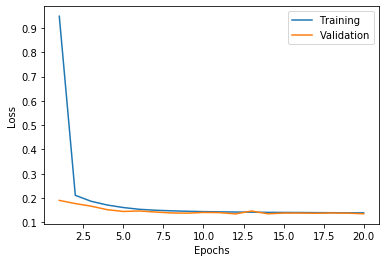

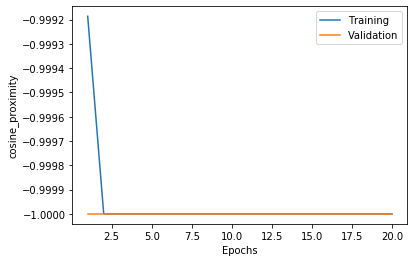

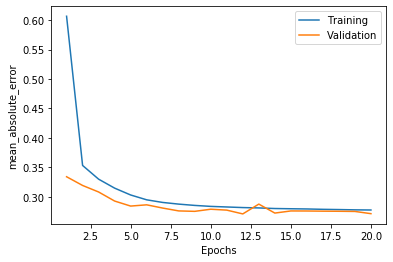

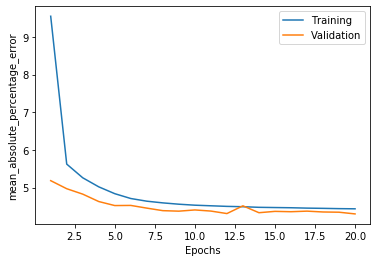

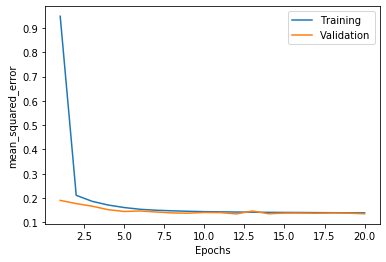

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
n_epochs = 20
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('cosine_proximity')
    plt.plot(x_plot, network_history.history['cosine_proximity'])
    plt.plot(x_plot, network_history.history['val_cosine_proximity'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_error')
    plt.plot(x_plot, network_history.history['mean_absolute_error'])
    plt.plot(x_plot, network_history.history['val_mean_absolute_error'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_absolute_percentage_error')
    plt.plot(x_plot, network_history.history['mean_absolute_percentage_error'])
    plt.plot(x_plot, network_history.history['val_mean_absolute_percentage_error'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('mean_squared_error')
    plt.plot(x_plot, network_history.history['mean_squared_error'])
    plt.plot(x_plot, network_history.history['val_mean_squared_error'])
    plt.legend(['Training', 'Validation'])

plot_history(best_history)

In [0]:
train_scaled_x, train_y, test_scaled_x, test_y = data()
best_model.evaluate(test_scaled_x, test_y)

289246/289246 [==============================] - 8s 27us/step


[0.13588511045021273,
 0.13588511045021273,
 0.2720165539763414,
 4.309878355436814,
 -0.9999999960566629]

In [0]:
best_model.metrics_names

['loss',
 'mean_squared_error',
 'mean_absolute_error',
 'mean_absolute_percentage_error',
 'cosine_proximity']

In [0]:
best_run

{'batch_size': 2, 'epochs': 2}

In [0]:
# predizione sul test set
pred = best_model.predict(test_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

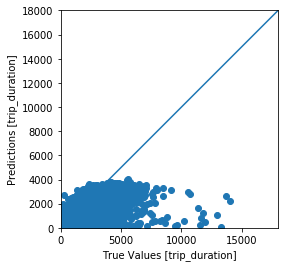

In [0]:
import matplotlib.pyplot as plt
test_y = np.exp(test_y)+1
a = plt.axes(aspect='equal')
plt.scatter(test_y, pred)
plt.xlabel('True Values [trip_duration]')
plt.ylabel('Predictions [trip_duration]')
lims = [0, 18000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
# Root Mean Squared Logarithmic Error
np.sqrt(np.mean(np.square(np.log(pred + 1) - np.log(test_y + 1)), axis=-1))

0.3667330741985624

# Prediction


In [0]:
# carlo
test_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/test_weather_osm.csv")
test_weather_osm = test_weather_osm.drop(columns=['id'])

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

test_weather_osm_array = np.array(test_weather_osm)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
test_weather_osm_scaled_x = scaler.fit_transform(test_weather_osm_array)

In [0]:
pred = best_model.predict(test_weather_osm_scaled_x)
pred = pred.flatten()
pred = np.exp(pred)+1

In [0]:
test_weather_osm = pd.read_csv("/content/drive/My Drive/universita/magistrale/advanced_machine_learning/Progetto AML/test_weather_osm.csv")

test_weather_osm['trip_duration'] = pred.tolist()

test_weather_osm[['id', 'trip_duration']].to_csv('neural_submission.csv', index=False)
!cp /content/neural_submission.csv "/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/"


cp: cannot create regular file '/content/drive/My Drive/UnimiB/Magistrale/Secondo Anno/Advanced Machine Learning/Progetto AML/': No such file or directory


In [0]:
test_weather_osm.shape

(625134, 21)